In [2209]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

<h3> Reading and understanding the data</h3>

In [2212]:
data = pd.read_csv("loan.csv")

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3>To Remove whitespace from the columns</h3>

In [2214]:
data.columns = data.columns.str.strip()
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

<h3>Drop duplicates</h3>

In [2216]:
data = data.drop_duplicates()
data.head(3)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3>Data Inspection</h3>

In [2218]:
data.shape

(39717, 111)

In [2219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<h3>Data Type convertion</h3>

In [2221]:
#int_rate-> string to float

data['int_rate'] = data['int_rate'].astype(str).str.replace('%', '')
data['int_rate'] = pd.to_numeric(data['int_rate'], errors='coerce')
data.int_rate.dtype

dtype('float64')

In [2222]:
## last_pymnt_amnt to float

data["last_pymnt_amnt"] = pd.to_numeric(data["last_pymnt_amnt"], errors='coerce')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3> HANDLING MISSING VALUES</h3>

In [2224]:
missing_cols = data.isnull().sum()
#This calculates the percentage of missing values for each of the filtered columns:
missing_cols = missing_cols[missing_cols > 0] / len(data) * 100
missing_cols

emp_title                       6.191303
emp_length                      2.706650
desc                           32.585543
title                           0.027696
mths_since_last_delinq         64.662487
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 68, dtype: float64

<h4>Strategy 1: Handle columns with <10% missing values</h4>

In [2226]:
#emp_title has many unique values, filling missing entries with the most frequent title may lead to inaccuracies, 
#especially if the mode is overly represented.
#In this case, filling missing values with “Unknown” or “Other” could be a more meaningful approach.

#1)Cleaning col 'emp_title'

data['emp_title']=data['emp_title'].str.title()   #to Capitalize the each word for well format
#Fill missing values with the most frequent title
data.fillna({'emp_title':'Unknown'},inplace=True) 
## Check if there are still any missing values
data.emp_title.isnull().sum()

0

In [2227]:
#2)emp_length

# Convert 'emp_length' to numeric by extracting the years part
data['emp_length'] = data['emp_length'].replace({
    '10+ years': 10,  # Convert '10+ years' to 10
    '< 1 year': 0     # Convert '< 1 year' to 0
    })
# Convert the remaining 'emp_length' values to numeric (remove non-numeric characters)
data['emp_length'] = data['emp_length'].astype(str).str.extract(r'(\d+)').astype(float)
# Fill missing values with the median
data.fillna({'emp_length':data['emp_length'].median()},inplace=True) 
data.emp_length.isnull().sum()


0

In [2228]:
#3) title','last_pymnt_d', 'last_credit_pull_d'

columns_fill_mode = ['title','last_pymnt_d', 'last_credit_pull_d']

for col in columns_fill_mode:
    data[col] = data[col].fillna(data[col].mode()[0])

In [2229]:
# 4)revol_util

data['revol_util'] = data['revol_util'].astype(str).str.replace('%', '', regex=False).astype(float)
data.fillna({'revol_util':data['revol_util'].median()},inplace=True) 
data.revol_util.isnull().sum()


0

In [2230]:
#5)collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens'

columns_fill_mode = ['collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']

for col in columns_fill_mode:
    data[col] = data[col].fillna(data[col].median())

<h2>Strategy 2: Handle columns with 10-50% missing values</h2>

In [2232]:
#1)Droping "Desc" column as it does not hold significate info
data =data.drop(columns=['desc'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 110 entries, id to total_il_high_credit_limit
dtypes: float64(77), int64(13), object(20)
memory usage: 33.3+ MB


<h2>Strategy 3: Dropping columns with 60% missing values and above</h2>

In [2235]:

cols_to_drop = missing_cols[missing_cols > 60].index
data.drop(columns=cols_to_drop, axis=1, inplace=True)


<h3>Format Columns</h3>

In [2238]:
# 1)Convert dates to yyy/mm/dd

data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
print(data[['issue_d', 'earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head())


     issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0 2011-12-01       1985-01-01   2015-01-01         2016-05-01
1 2011-12-01       1999-04-01   2013-04-01         2013-09-01
2 2011-12-01       2001-11-01   2014-06-01         2016-05-01
3 2011-12-01       1996-02-01   2015-01-01         2016-04-01
4 2011-12-01       1996-01-01   2016-05-01         2016-05-01


In [2240]:
#reset the index if any mismatch

data = data.reset_index(drop=True)
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [2241]:
data.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717,39717,...,39717.000000,39717,39717.0,39717.0,39717,39717.0,39717.0,39717.0,39717.000000,39717.0
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,NaN,NaN,12020,2917,...,NaN,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,12.021177,324.561922,NaN,NaN,...,2678.826162,2014-09-07 19:59:43.684568576,0.0,1.0,NaN,0.0,0.0,0.0,0.042501,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.690000,NaN,NaN,...,0.000000,2007-05-01 00:00:00,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,9.250000,167.020000,NaN,NaN,...,218.680000,2013-06-01 00:00:00,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,11.860000,280.220000,NaN,NaN,...,546.140000,2015-03-01 00:00:00,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,14.590000,430.780000,NaN,NaN,...,3293.160000,2016-05-01 00:00:00,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,NaN,24.590000,1305.190000,NaN,NaN,...,36115.200000,2016-05-01 00:00:00,0.0,1.0,NaN,0.0,0.0,0.0,2.000000,0.0


<h2>Exploratory Data Analysis (EDA)</h2>

<h4>UNVARIENT ANALYSIS-Numerical Variables(loan_amnt, int_rate,annual_inc,dti)</h4>

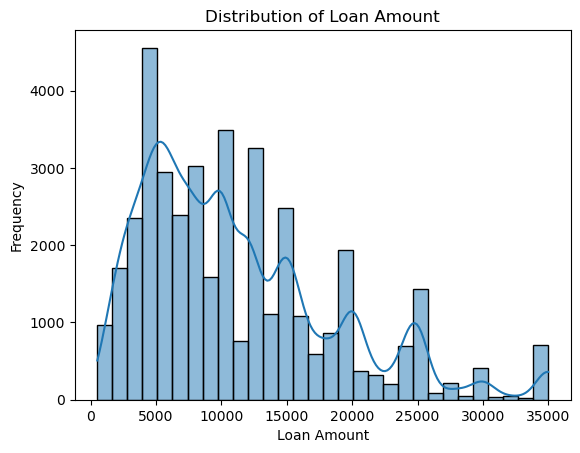

In [2247]:
# First histogram: Loan amount
sns.histplot(data['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



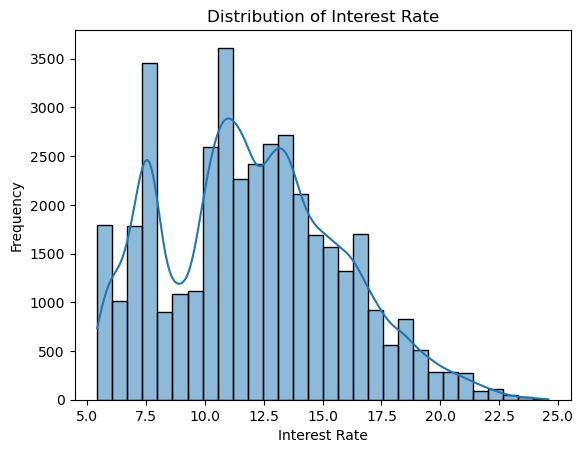

In [2248]:
# Second histogram: Interest Rate
sns.histplot(data['int_rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()


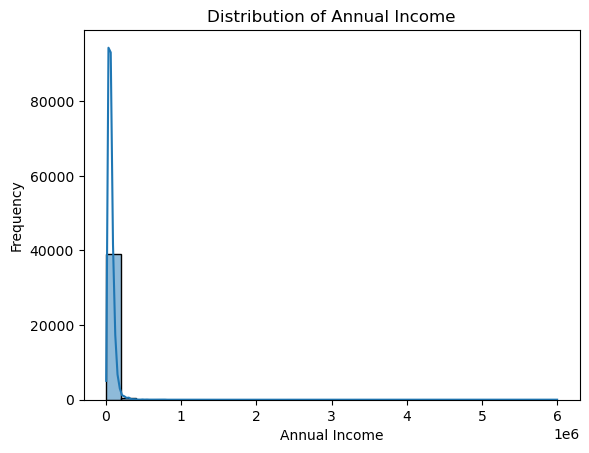

In [2251]:
# Third histogram: Annual Income
sns.histplot(data['annual_inc'], kde=True, bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


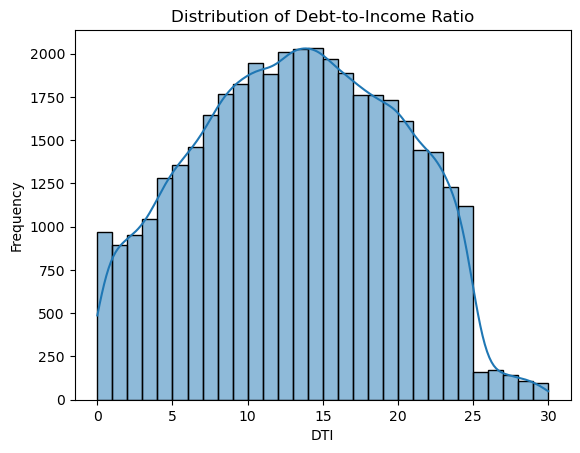

In [2252]:
# Fourth histogram: Debt-to-Income Ratio (DTI)
sns.histplot(data['dti'], kde=True, bins=30)
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

<h4>UNVARIENT ANALYSIS-Categorical variables(grade, sub_grade, home_ownership, and loan_status)</h4>

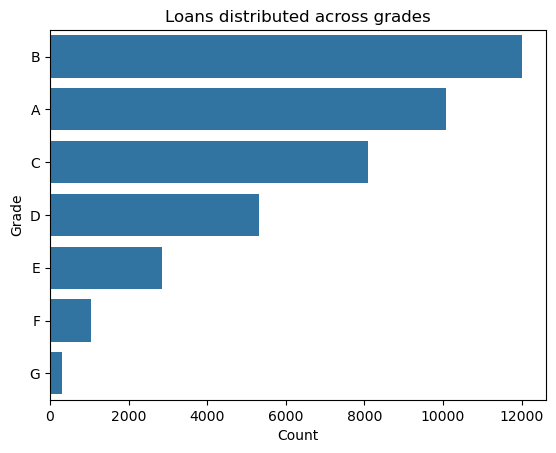

In [2255]:
# Plot 1: Loan Grade Distribution
sns.countplot(y=data['grade'], order=data['grade'].value_counts().index,)
plt.title('Loans distributed across grades')
plt.xlabel('Count')
plt.ylabel('Grade')
plt.show()


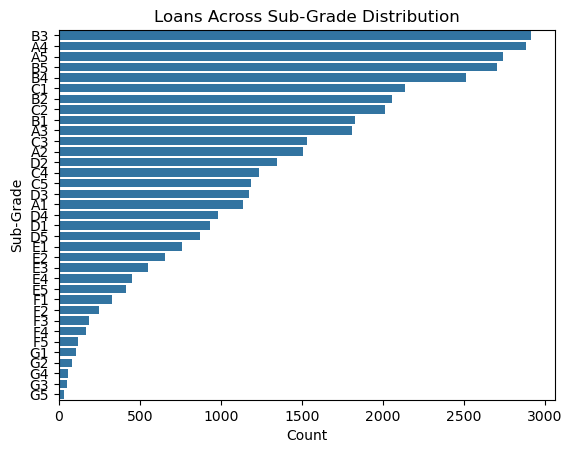

In [2258]:
# Plot 2: Sub-Grade Distribution
sns.countplot(y=data['sub_grade'], order=data['sub_grade'].value_counts().index,)
plt.title('Loans Across Sub-Grade Distribution')
plt.xlabel('Count')
plt.ylabel('Sub-Grade')
plt.show()


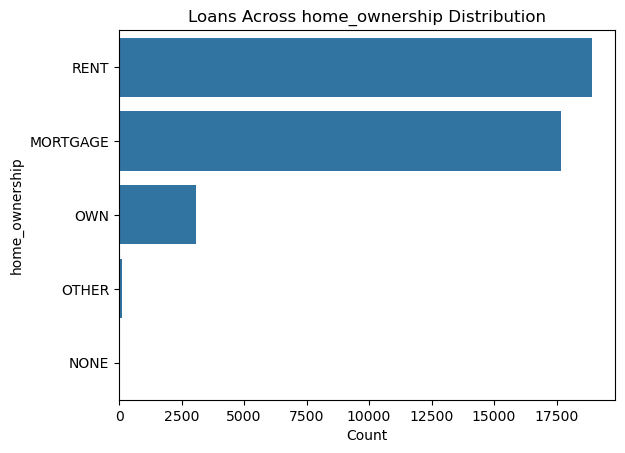

In [2309]:
# Plot 4: Home Ownership Distribution
sns.countplot(y=data['home_ownership'], order=data['home_ownership'].value_counts().index)
plt.title('Loans Across home_ownership Distribution')
plt.xlabel('Count')
plt.ylabel('home_ownership')
plt.show()


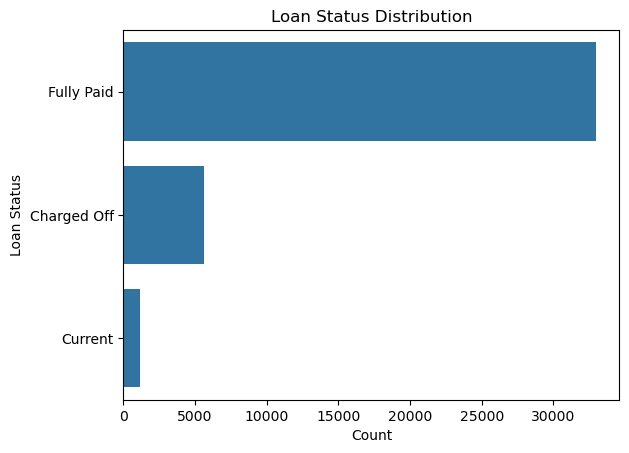

In [2262]:
# Plot 5: Loan Status Distribution

sns.countplot(y=data['loan_status'], order=data['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

<h3> Bivarient Analysis</h3>

<h4>Box plot : Loan Amount vs Loan Status</h4>

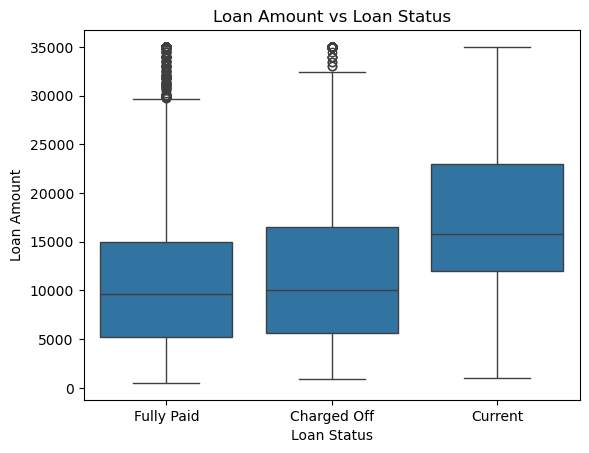

In [2268]:
sns.boxplot(data=data, x='loan_status', y='loan_amnt')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


<h4>Box plot : Interest Rate vs Loan Status</h4>

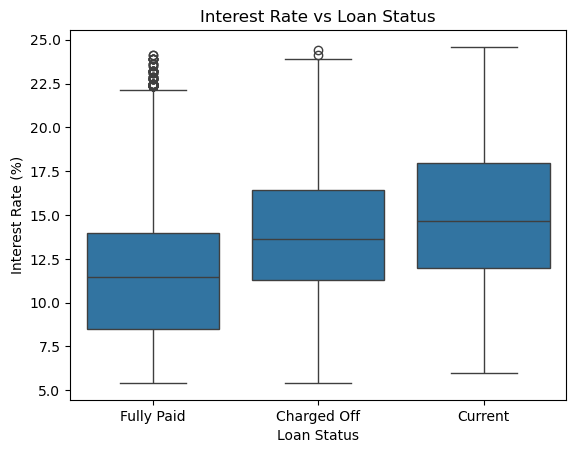

In [2271]:
sns.boxplot(data=data, x='loan_status', y='int_rate')
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

<h4>Box plot : Annual Income vs Loan Status</h4>

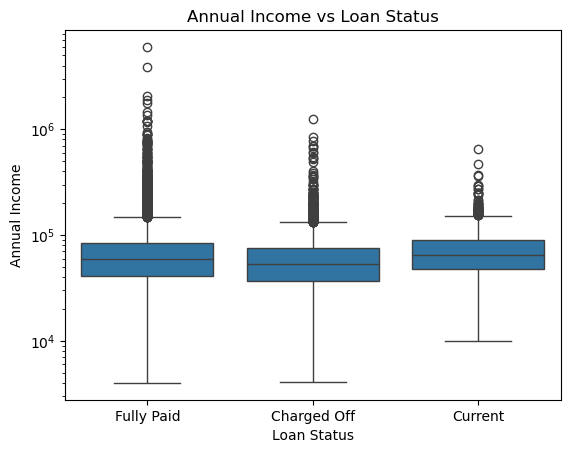

In [2274]:
# Plot 3: Annual Income vs Loan Status (Log Scale)
sns.boxplot(data=data, x='loan_status', y='annual_inc')
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.yscale('log')  # Use log scale for better visualization
plt.show()

<h4>Box plot: Debt-to-Income Ratio (DTI) by Loan Status</h4>

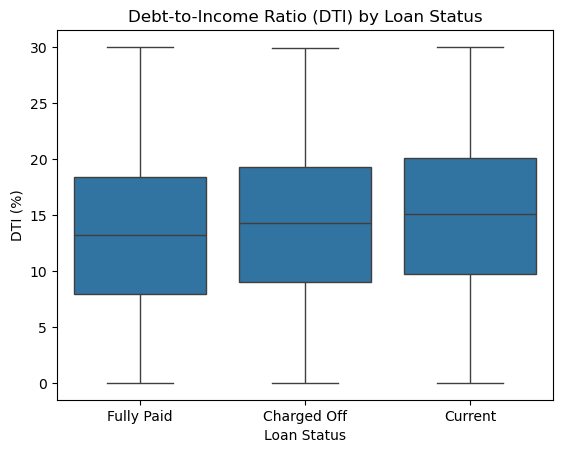

In [2277]:
#Debt-to-Income Ratio (DTI) by Loan Status

sns.boxplot(data=data, x='loan_status', y='dti')
plt.title('Debt-to-Income Ratio (DTI) by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI (%)')
plt.show()

<h4>Countplot :Loan Status by Grade</h4>

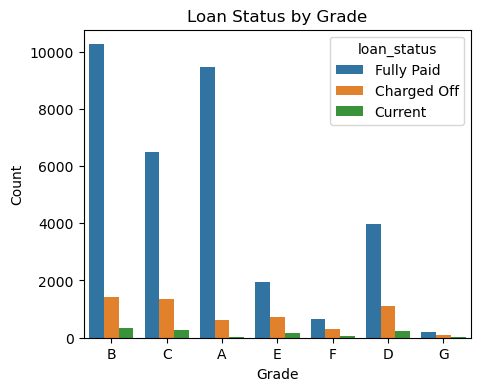

In [2279]:
#Examining whether lower loan grades (e.g., D, E, F) are more prone to defaults.

plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='grade', hue='loan_status')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


<h4>Countplot:Loan Status vs term </h4>

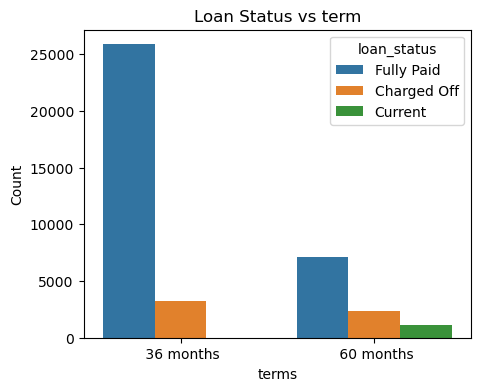

In [2281]:
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='term', hue='loan_status')
plt.title('Loan Status vs term')
plt.xlabel('terms')
plt.ylabel('Count')
plt.show()

<h3>Scatterplot: Interest Rate vs Loan Amount by Loan Status</h3>

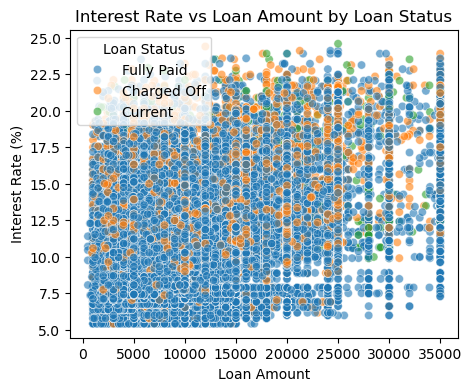

In [2284]:
# Scatter plot for `int_rate` vs. `loan_amnt`

plt.figure(figsize=(5, 4))
sns.scatterplot(data=data, x='loan_amnt', y='int_rate', hue='loan_status',alpha=0.6)
plt.title('Interest Rate vs Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status')
plt.show()

<h5>Derived column loan_status1, where 1 indicates fully paid and 0 indicates charged-off)</h5>

In [2286]:
print(data['loan_status'].unique())

# Create the new column loan_status1
data['loan_status1'] = data['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
data.loan_status1.head()

['Fully Paid' 'Charged Off' 'Current']


0    0
1    1
2    0
3    0
4    1
Name: loan_status1, dtype: int64

<h3>Correlation Heatmap</h3>

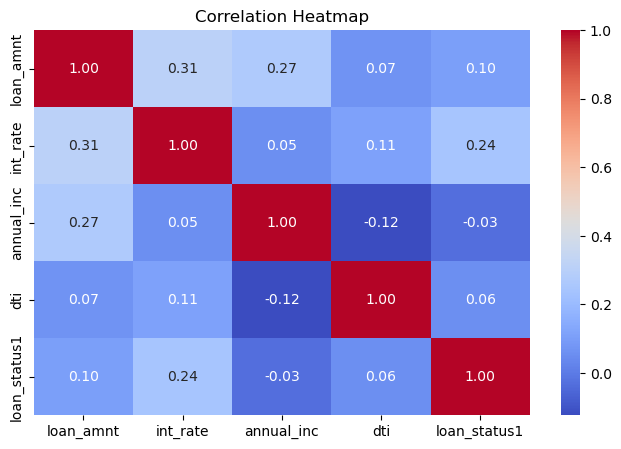

In [2288]:

plt.figure(figsize=(8, 5))
correlation_matrix = data[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status1']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<h3>Histogram-Interest Rate vs. Loan Amount by Loan Status</h3>

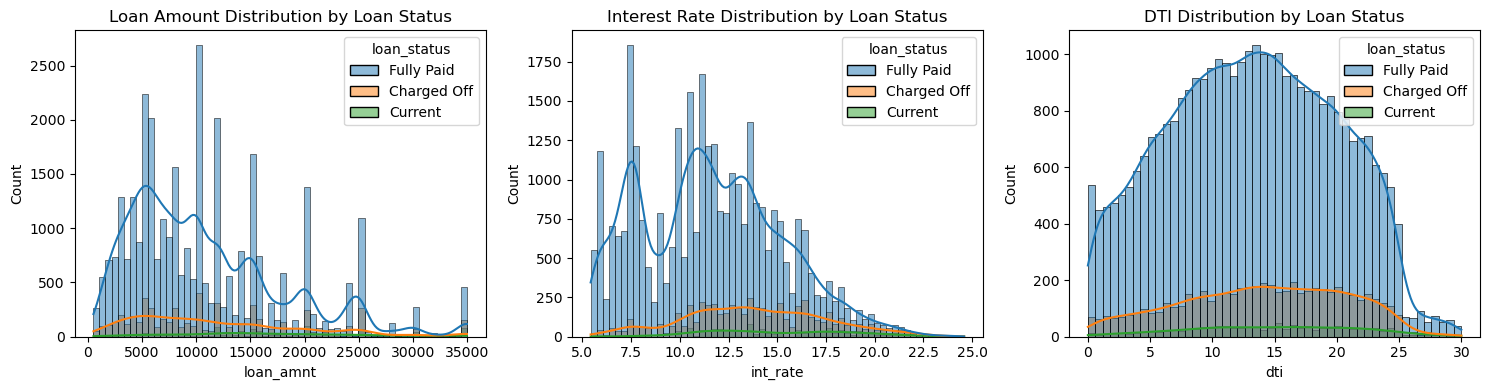

In [2190]:

fig, axs = plt.subplots(1, 3, figsize=(15, 4)) 

# Plot the loan amount distribution by loan status
sns.histplot(data=data, x='loan_amnt', hue='loan_status', kde=True,  ax=axs[0])
axs[0].set_title('Loan Amount Distribution by Loan Status')

# Plot the interest rate distribution by loan status
sns.histplot(data=data, x='int_rate', hue='loan_status', kde=True,  ax=axs[1])
axs[1].set_title('Interest Rate Distribution by Loan Status')

# Plot the dti distribution by loan status
sns.histplot(data=data, x='dti', hue='loan_status', kde=True, ax=axs[2])
axs[2].set_title('DTI Distribution by Loan Status')

plt.tight_layout()
plt.show()
